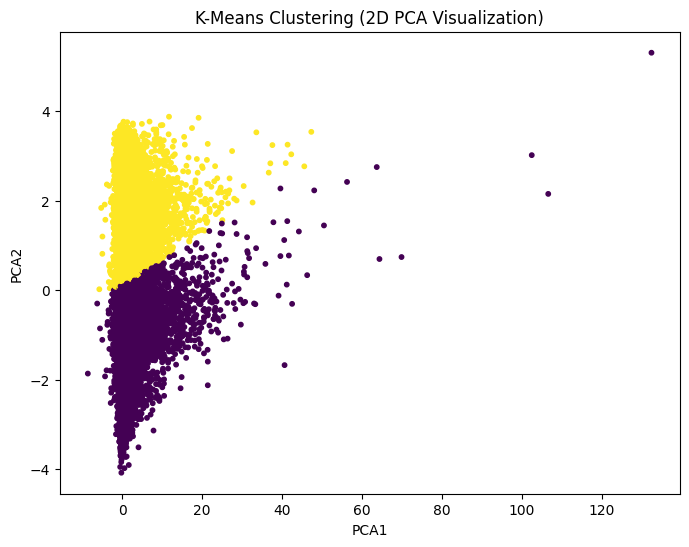


Cluster vs Actual Fraud Counts:
Cluster  Actual_Class
0        0               156449
         1                  332
1        0               127866
         1                  160
dtype: int64


In [3]:
# =====================================
# 📘 Assignment 8: Clustering + PCA Visualization
# Credit Card Fraud Detection Project
# =====================================

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 2: Load dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# Step 3: Prepare features (drop 'Class' because clustering is unsupervised)
X = df.drop('Class', axis=1)

# Step 4: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 6: Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Step 7: Add PCA results and clusters to a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Step 8: Visualize results
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', s=10)
plt.title("K-Means Clustering (2D PCA Visualization)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

# Step 9: (Optional) Compare clusters with actual fraud labels
pca_df['Actual_Class'] = df['Class']
print("\nCluster vs Actual Fraud Counts:")
print(pca_df.groupby(['Cluster', 'Actual_Class']).size())

